In [ ]:
#importing necessary libraries
!pip install pandas==1.5.3.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 21.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4
Mounted at /content/drive


In [ ]:
#concatenating wear column with each run
column_names = ["Axial_Force", "Bending_Moment_X", "Bending_Moment_Y", "Torsion_of_Z", "Vibration_Channel1", "Vibration_Channel2", "Spindle_Power", "Spindle_Current", 'Wear']

final_df=pd.read_csv("/content/drive/MyDrive/final_combined_file.csv", names=column_names)

final_df


<ipython-input-2-80466839fe1b>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  final_df=pd.read_csv("/content/drive/MyDrive/final_combined_file.csv", names=column_names)


,Axial_Force,Bending_Moment_X,Bending_Moment_Y,Torsion_of_Z,Vibration_Channel1,Vibration_Channel2,Spindle_Power,Spindle_Current,Wear
0,150.73,1.09360,-22.499000,22.7790,4.0570,4.2318,2.4841,1.0227,0.08
1,222.5,0.70764,-17.285000,23.5780,2.8741,3.2255,2.4841,1.0227,0.08
2,222.5,2.50890,-7.990900,22.8930,-0.3823,-0.0141,2.4841,1.0227,0.08
3,107.66,2.50890,16.038000,23.1210,-3.8655,-3.8392,2.4841,1.0227,0.08
4,21.532,0.19299,13.885000,24.9480,-4.0011,-3.7261,2.4841,1.0227,0.08
...,...,...,...,...,...,...,...,...,...
901478,186.61,1.67260,14.565000,13.4160,4.5845,4.4444,1.7334,1.6944,0.16
901479,258.39,2.44460,15.925000,10.9040,5.6614,5.8297,1.7334,1.6944,0.16
901480,129.19,1.92990,4.363800,2.5690,4.3217,4.5080,1.7334,1.6944,0.16
901481,114.84,-2.44460,0.056673,1.5414,1.2407,1.5607,1.7334,1.6944,0.16


In [ ]:
#checking for null values
final_df.isna().sum()

Axial_Force           0
Bending_Moment_X      1
Bending_Moment_Y      1
Torsion_of_Z          1
Vibration_Channel1    1
Vibration_Channel2    1
Spindle_Power         1
Spindle_Current       1
Wear                  1
dtype: int64

In [ ]:
#dropping null values
final_df.dropna(inplace=True)
final_df

,Axial_Force,Bending_Moment_X,Bending_Moment_Y,Torsion_of_Z,Vibration_Channel1,Vibration_Channel2,Spindle_Power,Spindle_Current,Wear
0,150.73,1.09360,-22.499000,22.7790,4.0570,4.2318,2.4841,1.0227,0.08
1,222.5,0.70764,-17.285000,23.5780,2.8741,3.2255,2.4841,1.0227,0.08
2,222.5,2.50890,-7.990900,22.8930,-0.3823,-0.0141,2.4841,1.0227,0.08
3,107.66,2.50890,16.038000,23.1210,-3.8655,-3.8392,2.4841,1.0227,0.08
4,21.532,0.19299,13.885000,24.9480,-4.0011,-3.7261,2.4841,1.0227,0.08
...,...,...,...,...,...,...,...,...,...
901477,129.19,-0.90063,1.076800,6.1086,3.7987,4.1617,1.7334,1.6944,0.16
901478,186.61,1.67260,14.565000,13.4160,4.5845,4.4444,1.7334,1.6944,0.16
901479,258.39,2.44460,15.925000,10.9040,5.6614,5.8297,1.7334,1.6944,0.16
901480,129.19,1.92990,4.363800,2.5690,4.3217,4.5080,1.7334,1.6944,0.16


In [ ]:
#splitting raw data for training and testing
from sklearn.model_selection import train_test_split
X = final_df.iloc[:, 0:8]
y = final_df['Wear']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
#passing raw data to knn

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
#checking performance of knn model on raw data
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

mse_knn = mean_squared_error(y_test, y_pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean squared error for KNN model:", mse_knn)
print("Mean absolute percentage error for KNN model:", mape_knn)
print("R2 score for KNN model:", r2_knn)

Mean squared error for KNN model: 0.0008495408714509946
Mean absolute percentage error for KNN model: 0.14609354448459774
R2 score for KNN model: 0.3444703287504396


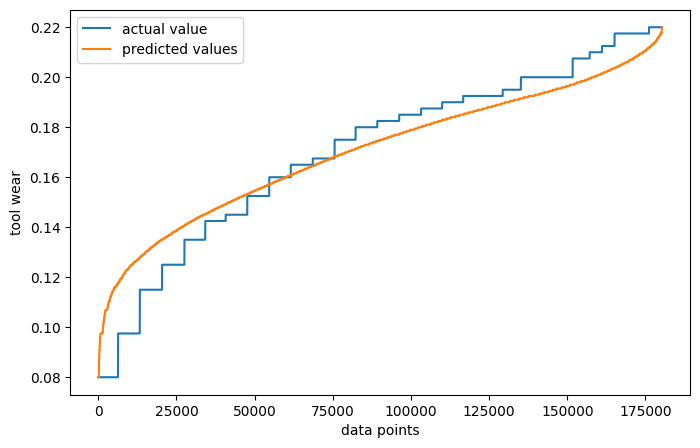

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred_knn}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()

In [ ]:
#passing raw data to decision tree
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=3)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

In [ ]:
#checking performance of decision tree model on raw data

mse_dt = mean_squared_error(y_test, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean squared error for DT model:", mse_dt)
print("Mean absolute percentage error for DT model:", mape_dt)
print("R2 score for DT model:", r2_dt)

Mean squared error for DT model: 0.0011172447990624424
Mean absolute percentage error for DT model: 0.1865569140900711
R2 score for DT model: 0.1379024359548644


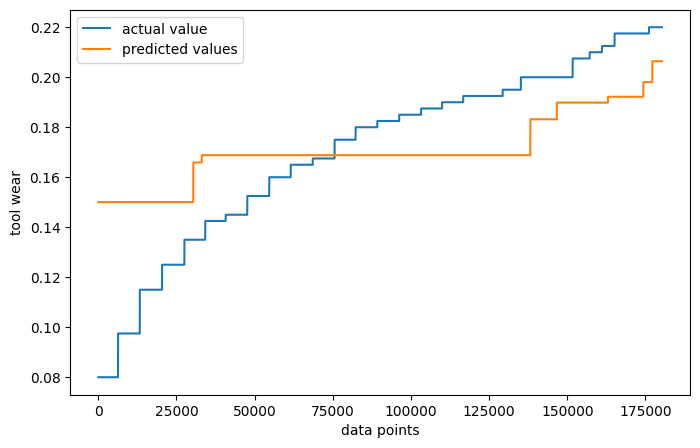

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred_dt}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()

In [ ]:
#installing the library TSFEL for feature extraction
!pip install tsfel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#getting temporal features
import tsfel
cfg = tsfel.get_features_by_domain('temporal')

In [ ]:
#assigning each run to a dataframe
df1=pd.read_csv('/content/drive/MyDrive/W1/1.csv', names=column_names)
df2=pd.read_csv('/content/drive/MyDrive/W1/2.csv', names=column_names)
df3=pd.read_csv('/content/drive/MyDrive/W1/3.csv', names=column_names)
df4=pd.read_csv('/content/drive/MyDrive/W1/4.csv', names=column_names)
df5=pd.read_csv('/content/drive/MyDrive/W1/5.csv', names=column_names)
df6=pd.read_csv('/content/drive/MyDrive/W1/6.csv', names=column_names)
df7=pd.read_csv('/content/drive/MyDrive/W1/7.csv', names=column_names)
df8=pd.read_csv('/content/drive/MyDrive/W1/8.csv', names=column_names)
df9=pd.read_csv('/content/drive/MyDrive/W1/9.csv', names=column_names)
df10=pd.read_csv('/content/drive/MyDrive/W1/10.csv', names=column_names)
df11=pd.read_csv('/content/drive/MyDrive/W1/11.csv', names=column_names)
df12=pd.read_csv('/content/drive/MyDrive/W1/12.csv', names=column_names)
df13=pd.read_csv('/content/drive/MyDrive/W1/13.csv', names=column_names)
df14=pd.read_csv('/content/drive/MyDrive/W1/14.csv', names=column_names)
df15=pd.read_csv('/content/drive/MyDrive/W1/15.csv', names=column_names)
df16=pd.read_csv('/content/drive/MyDrive/W1/16.csv', names=column_names)
df17=pd.read_csv('/content/drive/MyDrive/W1/17.csv', names=column_names)
df18=pd.read_csv('/content/drive/MyDrive/W1/18.csv', names=column_names)
df19=pd.read_csv('/content/drive/MyDrive/W1/19.csv', names=column_names)
df20=pd.read_csv('/content/drive/MyDrive/W1/20.csv', names=column_names)
df21=pd.read_csv('/content/drive/MyDrive/W1/21.csv', names=column_names)
df22=pd.read_csv('/content/drive/MyDrive/W1/22.csv', names=column_names)
df23=pd.read_csv('/content/drive/MyDrive/W1/23.csv', names=column_names)
df24=pd.read_csv('/content/drive/MyDrive/W1/24.csv', names=column_names)
df25=pd.read_csv('/content/drive/MyDrive/W1/25.csv', names=column_names)
df26=pd.read_csv('/content/drive/MyDrive/W1/26.csv', names=column_names)
df27=pd.read_csv('/content/drive/MyDrive/W1/27.csv', names=column_names)
df28=pd.read_csv('/content/drive/MyDrive/W1/28.csv', names=column_names)
df29=pd.read_csv('/content/drive/MyDrive/W1/29.csv', names=column_names)
df30=pd.read_csv('/content/drive/MyDrive/W1/30.csv', names=column_names)

In [ ]:
#extracting temporal features from each run
X1 = tsfel.time_series_features_extractor(cfg, df1.iloc[:, 0:8], fs=300, window_size=300)
X2 = tsfel.time_series_features_extractor(cfg, df2.iloc[:, 0:8], fs=300, window_size=300)
X3 = tsfel.time_series_features_extractor(cfg, df3.iloc[:, 0:8], fs=300, window_size=300)
X4 = tsfel.time_series_features_extractor(cfg, df4.iloc[:, 0:8], fs=300, window_size=300)
X5 = tsfel.time_series_features_extractor(cfg, df5.iloc[:, 0:8], fs=300, window_size=300)
X6 = tsfel.time_series_features_extractor(cfg, df6.iloc[:, 0:8], fs=300, window_size=300)
X7 = tsfel.time_series_features_extractor(cfg, df7.iloc[:, 0:8], fs=300, window_size=300)
X8 = tsfel.time_series_features_extractor(cfg, df8.iloc[:, 0:8], fs=300, window_size=300)
X9 = tsfel.time_series_features_extractor(cfg, df9.iloc[:, 0:8], fs=300, window_size=300)
X10 = tsfel.time_series_features_extractor(cfg, df10.iloc[:, 0:8], fs=300, window_size=300)
X11 = tsfel.time_series_features_extractor(cfg, df11.iloc[:, 0:8], fs=300, window_size=300)
X12 = tsfel.time_series_features_extractor(cfg, df12.iloc[:, 0:8], fs=300, window_size=300)
X13 = tsfel.time_series_features_extractor(cfg, df13.iloc[:, 0:8], fs=300, window_size=300)
X14 = tsfel.time_series_features_extractor(cfg, df14.iloc[:, 0:8], fs=300, window_size=300)
X15 = tsfel.time_series_features_extractor(cfg, df15.iloc[:, 0:8], fs=300, window_size=300)
X16 = tsfel.time_series_features_extractor(cfg, df16.iloc[:, 0:8], fs=300, window_size=300)
X17 = tsfel.time_series_features_extractor(cfg, df17.iloc[:, 0:8], fs=300, window_size=300)
X18 = tsfel.time_series_features_extractor(cfg, df18.iloc[:, 0:8], fs=300, window_size=300)
X19 = tsfel.time_series_features_extractor(cfg, df19.iloc[:, 0:8], fs=300, window_size=300)
X20 = tsfel.time_series_features_extractor(cfg, df20.iloc[:, 0:8], fs=300, window_size=300)
X21 = tsfel.time_series_features_extractor(cfg, df21.iloc[:, 0:8], fs=300, window_size=300)
X22 = tsfel.time_series_features_extractor(cfg, df22.iloc[:, 0:8], fs=300, window_size=300)
X23 = tsfel.time_series_features_extractor(cfg, df23.iloc[:, 0:8], fs=300, window_size=300)
X24 = tsfel.time_series_features_extractor(cfg, df24.iloc[:, 0:8], fs=300, window_size=300)
X25= tsfel.time_series_features_extractor(cfg, df25.iloc[:, 0:8], fs=300, window_size=300)
X26= tsfel.time_series_features_extractor(cfg, df26.iloc[:, 0:8], fs=300, window_size=300)
X27= tsfel.time_series_features_extractor(cfg, df27.iloc[:, 0:8], fs=300, window_size=300)
X28= tsfel.time_series_features_extractor(cfg, df28.iloc[:, 0:8], fs=300, window_size=300)
X29= tsfel.time_series_features_extractor(cfg, df29.iloc[:, 0:8], fs=300, window_size=300)
X30= tsfel.time_series_features_extractor(cfg, df30.iloc[:, 0:8], fs=300, window_size=300)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [ ]:
#concatenating wear with all temporal features
wear1=[]
for i in range (0,len(X1)):
    wear1.append("0.08")

wear2=[]
for i in range (0,len(X2)):
    wear2.append("0.0975")

wear3=[]
for i in range (0,len(X3)):
    wear3.append("0.115")

wear4=[]
for i in range (0,len(X4)):
    wear4.append("0.125")

wear5=[]
for i in range (0,len(X5)):
    wear5.append("0.135")

wear6=[]
for i in range (0,len(X6)):
    wear6.append("0.1425")

wear7=[]
for i in range (0,len(X7)):
    wear7.append("0.145")

wear8=[]
for i in range (0,len(X8)):
    wear8.append("0.1525")

wear9=[]
for i in range (0,len(X9)):
    wear9.append("0.16")

wear10=[]
for i in range (0,len(X10)):
    wear10.append("0.165")

wear11=[]
for i in range (0,len(X11)):
    wear11.append("0.1675")

wear12=[]
for i in range (0,len(X12)):
    wear12.append("0.175")

wear13=[]
for i in range (0,len(X13)):
    wear13.append("0.18")

wear14=[]
for i in range (0,len(X14)):
    wear14.append("0.1825")

wear15=[]
for i in range (0,len(X15)):
    wear15.append("0.185")

wear16=[]
for i in range (0,len(X16)):
    wear16.append("0.1875")

wear17=[]
for i in range (0,len(X17)):
    wear17.append("0.19")

wear18=[]
for i in range (0,len(X18)):
    wear18.append("0.1925")

wear19=[]
for i in range (0,len(X19)):
    wear19.append("0.1925")

wear20=[]
for i in range (0,len(X20)):
    wear20.append("0.195")

wear21=[]
for i in range (0,len(X21)):
    wear21.append("0.2")

wear22=[]
for i in range (0,len(X22)):
    wear22.append("0.2")

wear23=[]
for i in range (0,len(X23)):
    wear23.append("0.2")

wear24=[]
for i in range (0,len(X24)):
    wear24.append("0.2")

wear25=[]
for i in range (0,len(X25)):
    wear25.append("0.2075")

wear26=[]
for i in range (0,len(X26)):
    wear26.append("0.21")

wear27=[]
for i in range (0,len(X27)):
    wear27.append("0.2125")

wear28=[]
for i in range (0,len(X28)):
    wear28.append("0.2175")

wear29=[]
for i in range (0,len(X29)):
    wear29.append("0.2175")

wear30=[]
for i in range (0,len(X30)):
    wear30.append("0.22")

X1['Wear']=wear1
X2['Wear']=wear2
X3['Wear']=wear3
X4['Wear']=wear4
X5['Wear']=wear5
X6['Wear']=wear6
X7['Wear']=wear7
X8['Wear']=wear8
X9['Wear']=wear9
X10['Wear']=wear10
X11['Wear']=wear11
X12['Wear']=wear12
X13['Wear']=wear13
X14['Wear']=wear14
X15['Wear']=wear15
X16['Wear']=wear16
X17['Wear']=wear17
X18['Wear']=wear18
X19['Wear']=wear19
X20['Wear']=wear20
X21['Wear']=wear21
X22['Wear']=wear22
X23['Wear']=wear23
X24['Wear']=wear24
X25['Wear']=wear25
X26['Wear']=wear26
X27['Wear']=wear27
X28['Wear']=wear28
X29['Wear']=wear29
X30['Wear']=wear30

concatenated_df_temporal=pd.concat([X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30], join="inner")
concatenated_df_temporal

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Entropy,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,...,7_Negative turning points,7_Neighbourhood peaks,7_Peak to peak distance,7_Positive turning points,7_Signal distance,7_Slope,7_Sum absolute diff,7_Total energy,7_Zero crossing rate,Wear
0,1.767891e+07,175.367582,1.767891e+07,0.523538,0.664879,203.991755,-0.336080,186.6100,14.355,93.0,...,0.0,0.0,0.2644,0.0,299.049580,0.000054,0.5201,285.746625,0.0,0.08
1,2.027897e+07,196.516770,2.027897e+07,0.508735,0.672021,205.240060,0.048007,172.2620,0.000,93.0,...,0.0,0.0,2.8081,0.0,300.902034,-0.010735,2.9121,684.170169,1.0,0.08
2,2.524216e+07,235.944804,2.524216e+07,0.504463,0.667018,190.549249,0.047993,157.8990,0.000,96.0,...,0.0,0.0,0.1733,0.0,299.033309,0.000394,0.4375,810.565624,0.0,0.08
3,1.959359e+07,193.526173,1.959359e+07,0.457103,0.674155,188.292369,0.480067,157.9100,14.350,93.0,...,0.0,0.0,0.4853,0.0,299.108511,-0.000478,0.9360,961.981543,0.0,0.08
4,2.290746e+07,215.680599,2.290746e+07,0.512735,0.667178,205.671869,-0.288055,172.2500,0.000,94.0,...,0.0,0.0,0.3727,0.0,299.058135,-0.001574,0.5375,850.600134,0.0,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1.018158e+07,105.292103,1.018158e+07,0.511618,0.672544,193.189106,-1.728328,157.8980,0.000,88.0,...,0.0,0.0,0.6544,0.0,299.343479,-0.000779,1.8201,156.605722,0.0,0.22
66,9.036737e+06,104.215591,9.036737e+06,0.502792,0.667637,188.244391,0.432098,157.9074,14.350,94.0,...,0.0,0.0,2.6391,0.0,300.754220,0.008145,2.9121,363.642813,1.0,0.22
67,9.363531e+06,104.430925,9.363531e+06,0.487613,0.660687,189.828305,-0.480100,157.9020,0.000,90.0,...,0.0,0.0,0.6326,0.0,299.418619,0.000535,1.7809,798.089907,0.0,0.22
68,9.315338e+06,105.387971,9.315338e+06,0.471145,0.669274,188.100445,-0.960174,157.8990,0.000,92.0,...,1.0,0.0,0.4203,0.0,299.134498,-0.000645,0.9012,790.675708,0.0,0.22


In [ ]:
#only temporal features without wear
temporal_features=concatenated_df_temporal.drop(columns=["Wear"], axis = 1)
temporal_features

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Entropy,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,...,7_Median diff,7_Negative turning points,7_Neighbourhood peaks,7_Peak to peak distance,7_Positive turning points,7_Signal distance,7_Slope,7_Sum absolute diff,7_Total energy,7_Zero crossing rate
0,1.767891e+07,175.367582,1.767891e+07,0.523538,0.664879,203.991755,-0.336080,186.6100,14.355,93.0,...,0.0,0.0,0.0,0.2644,0.0,299.049580,0.000054,0.5201,285.746625,0.0
1,2.027897e+07,196.516770,2.027897e+07,0.508735,0.672021,205.240060,0.048007,172.2620,0.000,93.0,...,0.0,0.0,0.0,2.8081,0.0,300.902034,-0.010735,2.9121,684.170169,1.0
2,2.524216e+07,235.944804,2.524216e+07,0.504463,0.667018,190.549249,0.047993,157.8990,0.000,96.0,...,0.0,0.0,0.0,0.1733,0.0,299.033309,0.000394,0.4375,810.565624,0.0
3,1.959359e+07,193.526173,1.959359e+07,0.457103,0.674155,188.292369,0.480067,157.9100,14.350,93.0,...,0.0,0.0,0.0,0.4853,0.0,299.108511,-0.000478,0.9360,961.981543,0.0
4,2.290746e+07,215.680599,2.290746e+07,0.512735,0.667178,205.671869,-0.288055,172.2500,0.000,94.0,...,0.0,0.0,0.0,0.3727,0.0,299.058135,-0.001574,0.5375,850.600134,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1.018158e+07,105.292103,1.018158e+07,0.511618,0.672544,193.189106,-1.728328,157.8980,0.000,88.0,...,0.0,0.0,0.0,0.6544,0.0,299.343479,-0.000779,1.8201,156.605722,0.0
66,9.036737e+06,104.215591,9.036737e+06,0.502792,0.667637,188.244391,0.432098,157.9074,14.350,94.0,...,0.0,0.0,0.0,2.6391,0.0,300.754220,0.008145,2.9121,363.642813,1.0
67,9.363531e+06,104.430925,9.363531e+06,0.487613,0.660687,189.828305,-0.480100,157.9020,0.000,90.0,...,0.0,0.0,0.0,0.6326,0.0,299.418619,0.000535,1.7809,798.089907,0.0
68,9.315338e+06,105.387971,9.315338e+06,0.471145,0.669274,188.100445,-0.960174,157.8990,0.000,92.0,...,0.0,1.0,0.0,0.4203,0.0,299.134498,-0.000645,0.9012,790.675708,0.0


In [ ]:
#converting concatenated_df_temporal to csv
concatenated_df_temporal.to_csv('/content/drive/MyDrive/W1/concatenated_df_temporal.csv', index=False)

In [ ]:
#converting temporal_features to csv
temporal_features.to_csv('/content/drive/MyDrive/W1/temporal_features.csv', index=False)

In [ ]:
#getting spectral features
cfg_spectral = tsfel.get_features_by_domain('spectral')

In [ ]:
#extracting temporal features from each run
Y1 = tsfel.time_series_features_extractor(cfg_spectral, df1.iloc[:, 0:8], fs=300, window_size=300)
Y2 = tsfel.time_series_features_extractor(cfg_spectral, df2.iloc[:, 0:8], fs=300, window_size=300)
Y3 = tsfel.time_series_features_extractor(cfg_spectral, df3.iloc[:, 0:8], fs=300, window_size=300)
Y4 = tsfel.time_series_features_extractor(cfg_spectral, df4.iloc[:, 0:8], fs=300, window_size=300)
Y5 = tsfel.time_series_features_extractor(cfg_spectral, df5.iloc[:, 0:8], fs=300, window_size=300)
Y6 = tsfel.time_series_features_extractor(cfg_spectral, df6.iloc[:, 0:8], fs=300, window_size=300)
Y7 = tsfel.time_series_features_extractor(cfg_spectral, df7.iloc[:, 0:8], fs=300, window_size=300)
Y8 = tsfel.time_series_features_extractor(cfg_spectral, df8.iloc[:, 0:8], fs=300, window_size=300)
Y9 = tsfel.time_series_features_extractor(cfg_spectral, df9.iloc[:, 0:8], fs=300, window_size=300)
Y10 = tsfel.time_series_features_extractor(cfg_spectral, df10.iloc[:, 0:8], fs=300, window_size=300)
Y11 = tsfel.time_series_features_extractor(cfg_spectral, df11.iloc[:, 0:8], fs=300, window_size=300)
Y12 = tsfel.time_series_features_extractor(cfg_spectral, df12.iloc[:, 0:8], fs=300, window_size=300)
Y13 = tsfel.time_series_features_extractor(cfg_spectral, df13.iloc[:, 0:8], fs=300, window_size=300)
Y14 = tsfel.time_series_features_extractor(cfg_spectral, df14.iloc[:, 0:8], fs=300, window_size=300)
Y15 = tsfel.time_series_features_extractor(cfg_spectral, df15.iloc[:, 0:8], fs=300, window_size=300)
Y16 = tsfel.time_series_features_extractor(cfg_spectral, df16.iloc[:, 0:8], fs=300, window_size=300)
Y17 = tsfel.time_series_features_extractor(cfg_spectral, df17.iloc[:, 0:8], fs=300, window_size=300)
Y18 = tsfel.time_series_features_extractor(cfg_spectral, df18.iloc[:, 0:8], fs=300, window_size=300)
Y19 = tsfel.time_series_features_extractor(cfg_spectral, df19.iloc[:, 0:8], fs=300, window_size=300)
Y20 = tsfel.time_series_features_extractor(cfg_spectral, df20.iloc[:, 0:8], fs=300, window_size=300)
Y21 = tsfel.time_series_features_extractor(cfg_spectral, df21.iloc[:, 0:8], fs=300, window_size=300)
Y22 = tsfel.time_series_features_extractor(cfg_spectral, df22.iloc[:, 0:8], fs=300, window_size=300)
Y23 = tsfel.time_series_features_extractor(cfg_spectral, df23.iloc[:, 0:8], fs=300, window_size=300)
Y24 = tsfel.time_series_features_extractor(cfg_spectral, df24.iloc[:, 0:8], fs=300, window_size=300)
Y25= tsfel.time_series_features_extractor(cfg_spectral, df25.iloc[:, 0:8], fs=300, window_size=300)
Y26= tsfel.time_series_features_extractor(cfg_spectral, df26.iloc[:, 0:8], fs=300, window_size=300)
Y27= tsfel.time_series_features_extractor(cfg_spectral, df27.iloc[:, 0:8], fs=300, window_size=300)
Y28= tsfel.time_series_features_extractor(cfg_spectral, df28.iloc[:, 0:8], fs=300, window_size=300)
Y29= tsfel.time_series_features_extractor(cfg_spectral, df29.iloc[:, 0:8], fs=300, window_size=300)
Y30= tsfel.time_series_features_extractor(cfg_spectral, df30.iloc[:, 0:8], fs=300, window_size=300)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [ ]:
#creating a dataframe of all spectral features
spectral_features=pd.concat([Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18,Y19,Y20,Y21,Y22,Y23,Y24,Y25,Y26,Y27,Y28,Y29,Y30], join="inner")
spectral_features

,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_10,0_FFT mean coefficient_100,0_FFT mean coefficient_101,0_FFT mean coefficient_102,0_FFT mean coefficient_103,0_FFT mean coefficient_104,0_FFT mean coefficient_105,0_FFT mean coefficient_106,...,7_Wavelet standard deviation_8,7_Wavelet variance_0,7_Wavelet variance_1,7_Wavelet variance_2,7_Wavelet variance_3,7_Wavelet variance_4,7_Wavelet variance_5,7_Wavelet variance_6,7_Wavelet variance_7,7_Wavelet variance_8
0,11.838447,25.029311,317.450153,255.464338,132.189181,169.299212,6.051959,63.518640,280.941078,70.951191,...,0.414194,0.002946,0.010375,0.021966,0.037666,0.057324,0.080748,0.107734,0.138073,0.171556
1,3.404799,186.747138,15.088973,79.204347,100.181655,122.695619,220.442246,388.548639,67.581438,82.939975,...,1.294042,0.023585,0.085555,0.188915,0.332385,0.516120,0.741809,1.010218,1.321245,1.674544
2,20.194163,866.490517,382.484165,427.304493,102.486276,440.647252,645.916659,5.902384,18.671820,184.342256,...,0.654069,0.006724,0.023993,0.052205,0.090804,0.139257,0.197070,0.264053,0.340695,0.427807
3,5.198160,786.908081,807.106596,8.918075,292.777466,175.004532,339.618013,7.464979,230.924240,96.165297,...,0.605005,0.006502,0.023090,0.050186,0.087310,0.133854,0.188001,0.246115,0.305464,0.366031
4,2.536665,171.118250,858.296773,94.916565,36.790974,28.283921,794.623436,322.191576,148.168435,345.972076,...,0.652422,0.007161,0.025564,0.055621,0.095833,0.143641,0.199214,0.264270,0.339763,0.425655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,14.823183,631.478765,131.166720,27.214294,95.901657,62.741874,169.060349,53.242489,322.883057,130.698036,...,0.502005,0.003693,0.013332,0.029879,0.053267,0.083153,0.118463,0.158169,0.202181,0.252009
66,10.219572,110.803359,438.471213,296.684725,367.665111,107.501623,203.608106,148.074906,28.215556,36.843999,...,1.187353,0.020135,0.072662,0.161059,0.284818,0.440424,0.626323,0.845558,1.104296,1.409808
67,33.205209,697.277220,389.396166,149.218596,54.702460,26.558928,70.032350,7.879440,243.268691,14.088502,...,0.723764,0.007879,0.028308,0.062137,0.108806,0.167830,0.238755,0.321287,0.415844,0.523834
68,0.716221,439.441324,82.828377,49.641055,303.939127,286.778044,5.806641,166.437406,99.578695,338.909142,...,0.630907,0.006605,0.023188,0.050307,0.087452,0.134131,0.189716,0.253124,0.322988,0.398044


In [ ]:
#creating a dataframe of all spectral features with wear
concatenated_df_spectral=spectral_features
concatenated_df_spectral['Wear']= concatenated_df_temporal['Wear']
concatenated_df_spectral

,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_10,0_FFT mean coefficient_100,0_FFT mean coefficient_101,0_FFT mean coefficient_102,0_FFT mean coefficient_103,0_FFT mean coefficient_104,0_FFT mean coefficient_105,0_FFT mean coefficient_106,...,7_Wavelet variance_0,7_Wavelet variance_1,7_Wavelet variance_2,7_Wavelet variance_3,7_Wavelet variance_4,7_Wavelet variance_5,7_Wavelet variance_6,7_Wavelet variance_7,7_Wavelet variance_8,Wear
0,11.838447,25.029311,317.450153,255.464338,132.189181,169.299212,6.051959,63.518640,280.941078,70.951191,...,0.002946,0.010375,0.021966,0.037666,0.057324,0.080748,0.107734,0.138073,0.171556,0.08
1,3.404799,186.747138,15.088973,79.204347,100.181655,122.695619,220.442246,388.548639,67.581438,82.939975,...,0.023585,0.085555,0.188915,0.332385,0.516120,0.741809,1.010218,1.321245,1.674544,0.08
2,20.194163,866.490517,382.484165,427.304493,102.486276,440.647252,645.916659,5.902384,18.671820,184.342256,...,0.006724,0.023993,0.052205,0.090804,0.139257,0.197070,0.264053,0.340695,0.427807,0.08
3,5.198160,786.908081,807.106596,8.918075,292.777466,175.004532,339.618013,7.464979,230.924240,96.165297,...,0.006502,0.023090,0.050186,0.087310,0.133854,0.188001,0.246115,0.305464,0.366031,0.08
4,2.536665,171.118250,858.296773,94.916565,36.790974,28.283921,794.623436,322.191576,148.168435,345.972076,...,0.007161,0.025564,0.055621,0.095833,0.143641,0.199214,0.264270,0.339763,0.425655,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,14.823183,631.478765,131.166720,27.214294,95.901657,62.741874,169.060349,53.242489,322.883057,130.698036,...,0.003693,0.013332,0.029879,0.053267,0.083153,0.118463,0.158169,0.202181,0.252009,0.22
66,10.219572,110.803359,438.471213,296.684725,367.665111,107.501623,203.608106,148.074906,28.215556,36.843999,...,0.020135,0.072662,0.161059,0.284818,0.440424,0.626323,0.845558,1.104296,1.409808,0.22
67,33.205209,697.277220,389.396166,149.218596,54.702460,26.558928,70.032350,7.879440,243.268691,14.088502,...,0.007879,0.028308,0.062137,0.108806,0.167830,0.238755,0.321287,0.415844,0.523834,0.22
68,0.716221,439.441324,82.828377,49.641055,303.939127,286.778044,5.806641,166.437406,99.578695,338.909142,...,0.006605,0.023188,0.050307,0.087452,0.134131,0.189716,0.253124,0.322988,0.398044,0.22


In [ ]:
#converting concatenated_df_spectral to csv
concatenated_df_spectral.to_csv('/content/drive/MyDrive/W1/concatenated_df_spectral.csv', index=False)

In [ ]:
#converting spectral_features to csv
spectral_features.to_csv('/content/drive/MyDrive/W1/spectral_features.csv', index=False)

In [ ]:
# getting statistical features
cfg_statistical = tsfel.get_features_by_domain('statistical')

In [ ]:
#extracting statistical features from each run
Z1 = tsfel.time_series_features_extractor(cfg_statistical, df1.iloc[:, 0:8], fs=300, window_size=300)
Z2 = tsfel.time_series_features_extractor(cfg_statistical, df2.iloc[:, 0:8], fs=300, window_size=300)
Z3 = tsfel.time_series_features_extractor(cfg_statistical, df3.iloc[:, 0:8], fs=300, window_size=300)
Z4 = tsfel.time_series_features_extractor(cfg_statistical, df4.iloc[:, 0:8], fs=300, window_size=300)
Z5 = tsfel.time_series_features_extractor(cfg_statistical, df5.iloc[:, 0:8], fs=300, window_size=300)
Z6 = tsfel.time_series_features_extractor(cfg_statistical, df6.iloc[:, 0:8], fs=300, window_size=300)
Z7 = tsfel.time_series_features_extractor(cfg_statistical, df7.iloc[:, 0:8], fs=300, window_size=300)
Z8 = tsfel.time_series_features_extractor(cfg_statistical, df8.iloc[:, 0:8], fs=300, window_size=300)
Z9 = tsfel.time_series_features_extractor(cfg_statistical, df9.iloc[:, 0:8], fs=300, window_size=300)
Z10 = tsfel.time_series_features_extractor(cfg_statistical, df10.iloc[:, 0:8], fs=300, window_size=300)
Z11 = tsfel.time_series_features_extractor(cfg_statistical, df11.iloc[:, 0:8], fs=300, window_size=300)
Z12 = tsfel.time_series_features_extractor(cfg_statistical, df12.iloc[:, 0:8], fs=300, window_size=300)
Z13 = tsfel.time_series_features_extractor(cfg_statistical, df13.iloc[:, 0:8], fs=300, window_size=300)
Z14 = tsfel.time_series_features_extractor(cfg_statistical, df14.iloc[:, 0:8], fs=300, window_size=300)
Z15 = tsfel.time_series_features_extractor(cfg_statistical, df15.iloc[:, 0:8], fs=300, window_size=300)
Z16 = tsfel.time_series_features_extractor(cfg_statistical, df16.iloc[:, 0:8], fs=300, window_size=300)
Z17 = tsfel.time_series_features_extractor(cfg_statistical, df17.iloc[:, 0:8], fs=300, window_size=300)
Z18 = tsfel.time_series_features_extractor(cfg_statistical, df18.iloc[:, 0:8], fs=300, window_size=300)
Z19 = tsfel.time_series_features_extractor(cfg_statistical, df19.iloc[:, 0:8], fs=300, window_size=300)
Z20 = tsfel.time_series_features_extractor(cfg_statistical, df20.iloc[:, 0:8], fs=300, window_size=300)
Z21 = tsfel.time_series_features_extractor(cfg_statistical, df21.iloc[:, 0:8], fs=300, window_size=300)
Z22 = tsfel.time_series_features_extractor(cfg_statistical, df22.iloc[:, 0:8], fs=300, window_size=300)
Z23 = tsfel.time_series_features_extractor(cfg_statistical, df23.iloc[:, 0:8], fs=300, window_size=300)
Z24 = tsfel.time_series_features_extractor(cfg_statistical, df24.iloc[:, 0:8], fs=300, window_size=300)
Z25= tsfel.time_series_features_extractor(cfg_statistical, df25.iloc[:, 0:8], fs=300, window_size=300)
Z26= tsfel.time_series_features_extractor(cfg_statistical, df26.iloc[:, 0:8], fs=300, window_size=300)
Z27= tsfel.time_series_features_extractor(cfg_statistical, df27.iloc[:, 0:8], fs=300, window_size=300)
Z28= tsfel.time_series_features_extractor(cfg_statistical, df28.iloc[:, 0:8], fs=300, window_size=300)
Z29= tsfel.time_series_features_extractor(cfg_statistical, df29.iloc[:, 0:8], fs=300, window_size=300)
Z30= tsfel.time_series_features_extractor(cfg_statistical, df30.iloc[:, 0:8], fs=300, window_size=300)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [ ]:
#creating a dataframe of all statistical features
statistical_features=pd.concat([Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11,Z12,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Z21,Z22,Z23,Z24,Z25,Z26,Z27,Z28,Z29,Z30], join="inner")
statistical_features

,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,0_ECDF_2,0_ECDF_3,0_ECDF_4,0_ECDF_5,...,7_Max,7_Mean,7_Mean absolute deviation,7_Median,7_Median absolute deviation,7_Min,7_Root mean square,7_Skewness,7_Standard deviation,7_Variance
0,60.0,240.0,21.532,308.63,0.003333,0.006667,0.01,0.013333,0.016667,0.02,...,1.0314,0.972025,0.064621,1.02270,0.00870,0.7670,0.974327,-0.522281,0.066942,0.004481
1,60.0,240.0,35.887,337.34,0.003333,0.006667,0.01,0.013333,0.016667,0.02,...,1.1354,-0.912192,1.052489,-1.58170,0.05640,-1.6727,1.507636,1.092474,1.200363,1.440871
2,60.0,240.0,78.951,380.40,0.003333,0.006667,0.01,0.013333,0.016667,0.02,...,-1.5644,-1.639081,0.076668,-1.57310,0.00870,-1.7377,1.640999,-0.270435,0.079319,0.006292
3,60.0,240.0,35.887,337.34,0.003333,0.006667,0.01,0.013333,0.016667,0.02,...,-1.5124,-1.777818,0.165644,-1.74640,0.19070,-1.9977,1.787713,-0.003643,0.187826,0.035278
4,60.0,240.0,64.597,366.05,0.003333,0.006667,0.01,0.013333,0.016667,0.02,...,-1.5124,-1.673511,0.151406,-1.56870,0.05630,-1.8851,1.681036,-0.456612,0.158886,0.025245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,60.0,240.0,-136.370,165.08,0.003333,0.006667,0.01,0.013333,0.016667,0.02,...,-0.3033,-0.694833,0.151928,-0.75840,0.10400,-0.9577,0.721304,0.922348,0.193615,0.037487
66,60.0,240.0,-150.730,165.08,0.003333,0.006667,0.01,0.013333,0.016667,0.02,...,1.6641,-0.447312,0.796625,-0.95770,0.01730,-0.9750,1.099137,1.531404,1.003999,1.008014
67,60.0,240.0,-107.660,165.08,0.003333,0.006667,0.01,0.013333,0.016667,0.02,...,2.0107,1.613796,0.188305,1.58610,0.17770,1.3781,1.628322,0.502298,0.217010,0.047093
68,60.0,240.0,-122.020,165.08,0.003333,0.006667,0.01,0.013333,0.016667,0.02,...,1.8764,1.616615,0.083131,1.57525,0.00655,1.4561,1.620741,1.687177,0.115565,0.013355


In [ ]:
#creating a dataframe of all statistical features with wear
concatenated_df_statistical=statistical_features
concatenated_df_statistical['Wear']= concatenated_df_temporal['Wear']
concatenated_df_statistical

,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,0_ECDF_2,0_ECDF_3,0_ECDF_4,0_ECDF_5,...,7_Mean,7_Mean absolute deviation,7_Median,7_Median absolute deviation,7_Min,7_Root mean square,7_Skewness,7_Standard deviation,7_Variance,Wear
0,60.0,240.0,21.532,308.63,0.003333,0.006667,0.01,0.013333,0.016667,0.02,...,0.972025,0.064621,1.02270,0.00870,0.7670,0.974327,-0.522281,0.066942,0.004481,0.08
1,60.0,240.0,35.887,337.34,0.003333,0.006667,0.01,0.013333,0.016667,0.02,...,-0.912192,1.052489,-1.58170,0.05640,-1.6727,1.507636,1.092474,1.200363,1.440871,0.08
2,60.0,240.0,78.951,380.40,0.003333,0.006667,0.01,0.013333,0.016667,0.02,...,-1.639081,0.076668,-1.57310,0.00870,-1.7377,1.640999,-0.270435,0.079319,0.006292,0.08
3,60.0,240.0,35.887,337.34,0.003333,0.006667,0.01,0.013333,0.016667,0.02,...,-1.777818,0.165644,-1.74640,0.19070,-1.9977,1.787713,-0.003643,0.187826,0.035278,0.08
4,60.0,240.0,64.597,366.05,0.003333,0.006667,0.01,0.013333,0.016667,0.02,...,-1.673511,0.151406,-1.56870,0.05630,-1.8851,1.681036,-0.456612,0.158886,0.025245,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,60.0,240.0,-136.370,165.08,0.003333,0.006667,0.01,0.013333,0.016667,0.02,...,-0.694833,0.151928,-0.75840,0.10400,-0.9577,0.721304,0.922348,0.193615,0.037487,0.22
66,60.0,240.0,-150.730,165.08,0.003333,0.006667,0.01,0.013333,0.016667,0.02,...,-0.447312,0.796625,-0.95770,0.01730,-0.9750,1.099137,1.531404,1.003999,1.008014,0.22
67,60.0,240.0,-107.660,165.08,0.003333,0.006667,0.01,0.013333,0.016667,0.02,...,1.613796,0.188305,1.58610,0.17770,1.3781,1.628322,0.502298,0.217010,0.047093,0.22
68,60.0,240.0,-122.020,165.08,0.003333,0.006667,0.01,0.013333,0.016667,0.02,...,1.616615,0.083131,1.57525,0.00655,1.4561,1.620741,1.687177,0.115565,0.013355,0.22


In [ ]:
#converting concatenated_df_statistical to csv
concatenated_df_statistical.to_csv('/content/drive/MyDrive/W1/concatenated_df_statistical.csv', index=False)

In [ ]:
#converting statistical_features to csv
statistical_features.to_csv('/content/drive/MyDrive/W1/statistical_features.csv', index=False)